In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
import pickle
#%matplotlib inline to /kaggle/temp/, but they won't be saved outside of the current session

# Load model

In [4]:
model = pickle.load(open('/kaggle/input/taxi-demand-linear-regression/lr_model.sav', 'rb'))

# Get input data

In [5]:
df = pd.read_csv("/kaggle/input/taxi-demand-dataset/taxi.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(pd.DatetimeIndex(df['datetime']), inplace=True)
df.drop(['datetime'],axis=1,inplace=True)
df_resample = df.resample('1H').sum()
def get_new_features(data, max_lag, roll_1, roll_2):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag+1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
        
    data['rolling_mean_1'] = data['num_orders'].shift().rolling(roll_1).mean()
    data['rolling_mean_2'] = data['num_orders'].shift().rolling(roll_2).mean()
    data.dropna(inplace=True)
df_for_lin = df_resample.copy()
get_new_features(df_for_lin, 25, 12, 24)
X_train, X_test, y_train, y_test = train_test_split(df_for_lin.drop('num_orders', axis=1), df_for_lin['num_orders'],
                                                    shuffle=False, test_size=0.1, random_state=42)

# Get output data

--------------------------------------------------



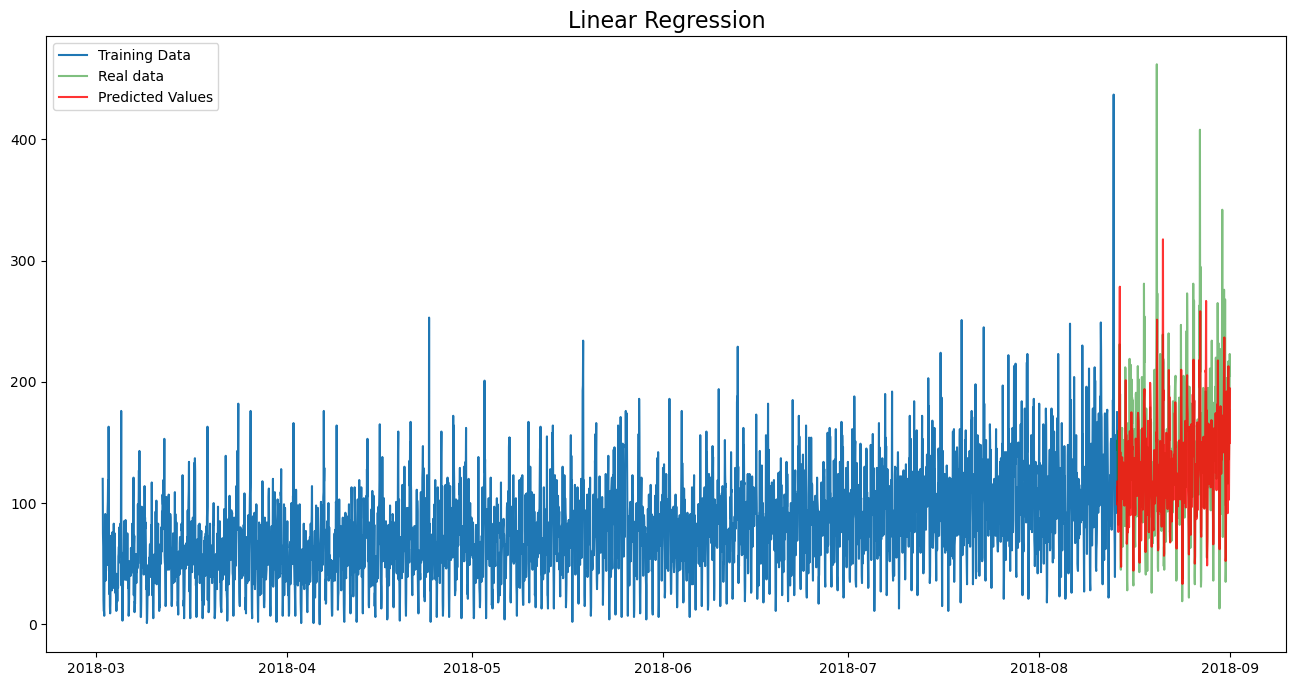

In [8]:
model.fit(X_train, y_train) 
predict = model.predict(X_test) 
#print(f'RMSE on test data is: {rmse(y_test, predict)}')
print('-' * 50) 
print()
plt.figure(figsize=(16, 8)) 
plt.plot(y_train, label='Training Data')
plt.plot(y_test, 'g', label='Real data', alpha=0.5) 
plt.plot(pd.Series(predict, index=y_test.index), 'r', label='Predicted Values', alpha=0.8) 
plt.title('Linear Regression', fontsize=16) 
plt.legend();